# Construire un modèle d’apprentissage automatique de bout en bout : processus que nous pouvons suivre

Pour créer un modèle Machine Learning de bout en bout, vous devez d’abord entraîner un modèle Machine Learning comme vous le faites pour chaque problème Machine Learning que vous résolvez. Une fois que vous avez formé votre modèle, vous trouverez ci-dessous le processus que vous pouvez suivre pour transformer votre modèle de machine learning en une solution de bout en bout à l’aide du framework dash :

Configurez une nouvelle application Dash.

Créez la mise en page de l’application en utilisant le HTML et les composants de base de Dash. Il comprend des champs de saisie, des boutons et des zones d’affichage de sortie.

Écrivez des fonctions de rappel pour définir l’interactivité de l’application, telles que la prise d’entrées utilisateur, l’exécution de la prédiction du modèle et l’affichage des résultats.

Chargez le modèle dans l’application pour l’utiliser pour les prédictions.



Le processus commence donc par la création d’un modèle d’apprentissage automatique. Pour gagner du temps, j’utiliserai un modèle d’apprentissage automatique que j’ai déjà entraîné.

La prévision des prix de l’immobilier est le processus d’estimation ou de prévision des prix futurs des propriétés immobilières, telles que les maisons, les appartements ou les bâtiments commerciaux. L’objectif est de fournir des taux de propriété précis aux acheteurs, vendeurs, investisseurs et professionnels de l’immobilier afin de prendre des décisions éclairées sur les transactions immobilières.

# Prévision des prix de l’immobilier : processus à suivre

Rassemblez des données pertinentes à partir de diverses sources, y compris des bases de données immobilières, des dossiers gouvernementaux, des annonces en ligne et d’autres sources publiques ou privées.

Nettoyez et préparez les données collectées en traitant les valeurs manquantes, en supprimant les valeurs aberrantes et en convertissant les variables catégorielles en représentations numériques.
Créez de nouvelles fonctionnalités ou transformez des fonctionnalités existantes pour capturer des informations importantes qui peuvent influencer les prix de l’immobilier.
Explorez et visualisez les données pour obtenir des informations sur leur distribution, leurs corrélations et leurs modèles.
Choisissez des algorithmes d’apprentissage automatique ou des modèles prédictifs appropriés pour la tâche.
Entraînez le modèle sélectionné sur les données d’entraînement, en optimisant ses paramètres pour faire des prédictions précises.

In [1]:
import pandas as pd

# Load the dataset
real_estate_data = pd.read_csv("Real_Estate.csv")

# Display the first few rows of the dataset and the info about the dataset
real_estate_data_head = real_estate_data.head()
data_info = real_estate_data.info()

print(real_estate_data_head)
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

Le jeu de données contient 7 colonnes. Voici un bref aperçu des colonnes :

Date de la transaction : La date de la transaction immobilière.
Âge de la maison : Âge de la maison en années.
Distance à la station de MRT la plus proche : Distance à la station de transport en commun rapide la plus proche en mètres.
Nombre de magasins de proximité : Nombre de magasins de proximité à proximité.
Latitude : Latitude de l’emplacement de la propriété.
Longitude : Longitude de l’emplacement de la propriété.
Prix de la surface de l’unité : Prix de la maison de la surface de l’unité.

Voyons maintenant si les données contiennent des valeurs nulles ou non :

In [2]:
print(real_estate_data.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


Il n’y a pas de valeurs nulles dans le jeu de données. Examinons maintenant les statistiques descriptives de l’ensemble de données :

In [3]:
# Descriptive statistics of the dataset
descriptive_stats = real_estate_data.describe()

print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

Voyons maintenant les histogrammes de toutes les caractéristiques numériques :

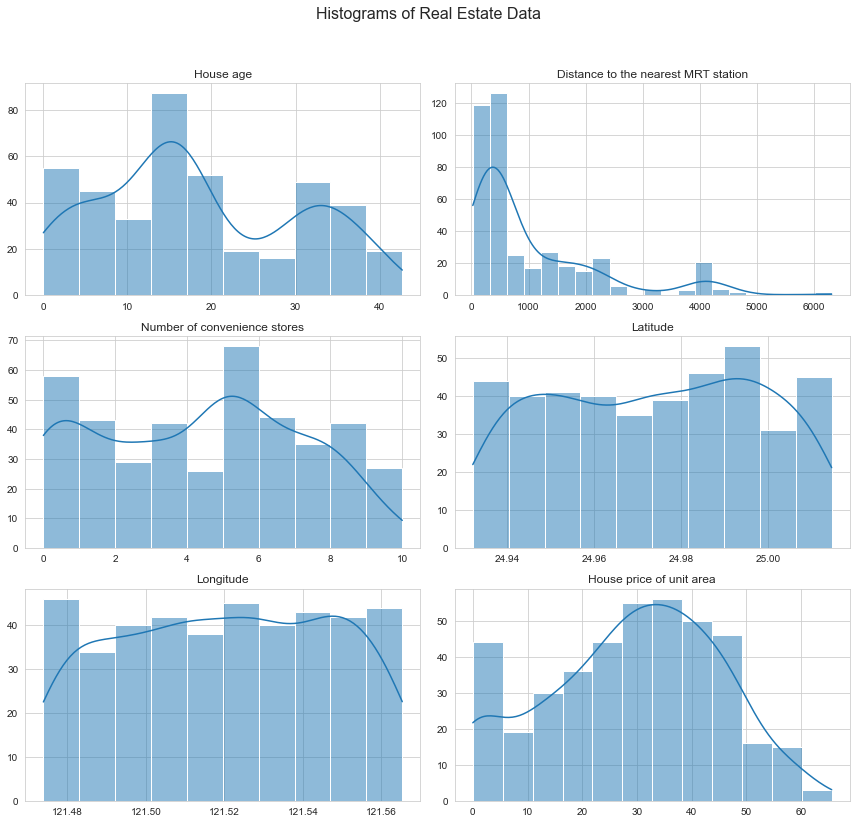

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Les histogrammes donnent un aperçu de la distribution de chaque variable :

Âge de la maison : Cela montre une distribution relativement uniforme avec une légère augmentation du nombre de propriétés plus récentes (âge inférieur).
Distance de la station de MRT la plus proche : La plupart des propriétés sont situées à proximité d’une station de MRT, comme l’indique la fréquence élevée des distances plus faibles. Il y a une longue queue qui s’étend vers des distances plus élevées, ce qui suggère que certaines propriétés sont assez éloignées des stations de MRT.
Nombre de dépanneurs : Affiche une large gamme, avec des pics notables à des nombres spécifiques, comme 0, 5 et 10. Il suggère certaines configurations courantes en termes de disponibilité des magasins de proximité.
Latitude et longitude : Les deux montrent des distributions relativement concentrées, ce qui indique que les propriétés sont situées dans une zone géographiquement limitée.
Prix des maisons de la surface unitaire : affiche une distribution asymétrique à droite, avec une concentration de propriétés dans la fourchette de prix inférieure et moins de propriétés à mesure que les prix augmentent.


Ensuite, je créerai des nuages de points pour explorer les relations entre ces variables et le prix de l’immobilier. Cela nous aidera à comprendre quels facteurs pourraient influencer les prix de l’immobilier de manière plus significative :

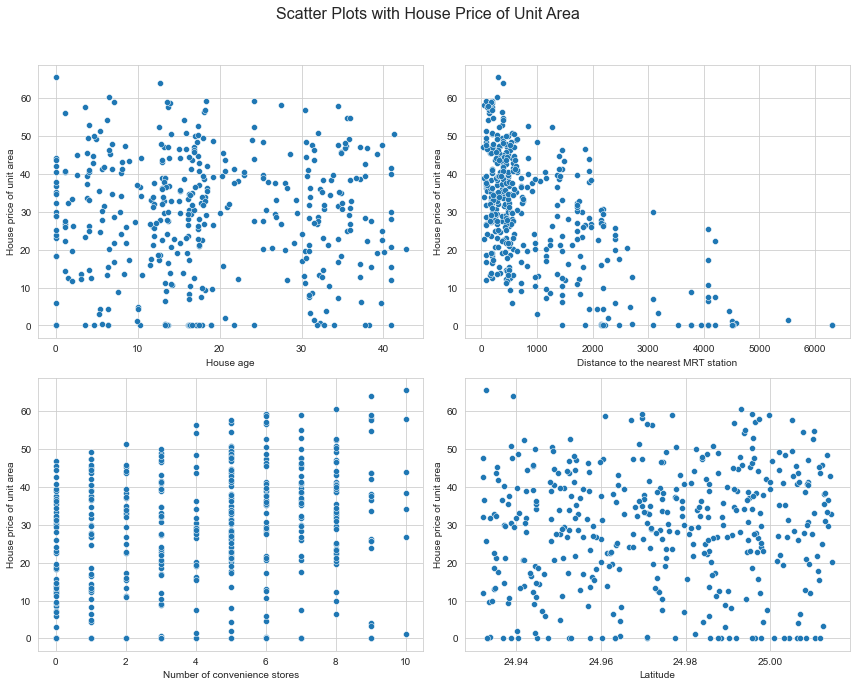

In [5]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Les nuages de points ont révélé des relations intéressantes entre divers facteurs et les prix des maisons :

Âge de la maison vs prix de la maison : Il ne semble pas y avoir de relation linéaire forte entre l’âge de la maison et le prix. Cependant, il semble que les maisons très neuves et très anciennes puissent avoir des prix plus élevés.
Distance à la station de MRT la plus proche par rapport au prix de la maison : Il y a une tendance claire montrant que plus la distance jusqu’à la station de MRT la plus proche augmente, plus le prix de la maison a tendance à diminuer. Cela suggère une forte relation négative entre ces deux variables.
Nombre de dépanneurs par rapport au prix des maisons : Il semble y avoir une relation positive entre le nombre de dépanneurs et les prix des maisons. Les maisons avec plus de dépanneurs à proximité ont tendance à avoir des prix plus élevés.
Latitude vs prix des maisons : Bien qu’il ne s’agisse pas d’une relation linéaire forte, il semble y avoir une tendance où certaines latitudes correspondent à des prix de maisons plus élevés ou plus bas. Cela pourrait indiquer que des quartiers spécifiques sont plus souhaitables.


Enfin, il serait utile d’effectuer une analyse de corrélation pour quantifier les relations entre ces variables, en particulier la corrélation entre chacune d’entre elles et le prix de l’immobilier :

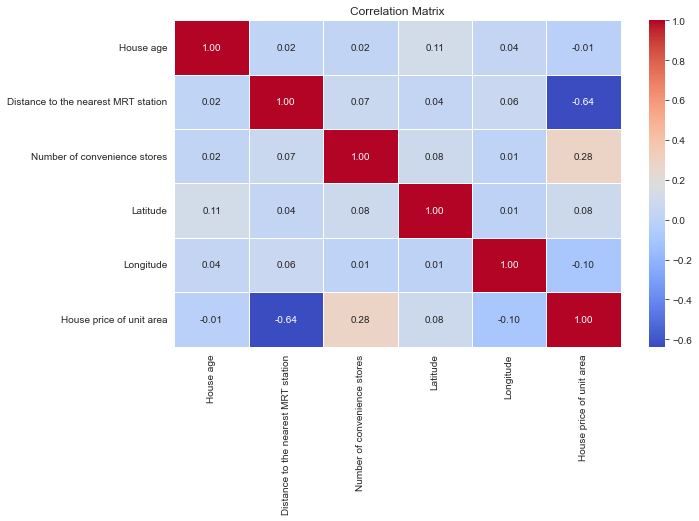

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [6]:
# Correlation matrix
correlation_matrix = real_estate_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

La matrice de corrélation fournit des informations quantifiées sur la façon dont chaque variable est liée aux autres, en particulier en ce qui concerne le prix des maisons :

Âge de la maison : Cela montre une très faible corrélation négative avec le prix de l’immobilier (-0,012), ce qui implique que l’âge n’est pas un prédicteur fort du prix dans cet ensemble de données.
Distance à la station de MRT la plus proche : A une forte corrélation négative avec le prix de l’immobilier (-0,637). Cela indique que les propriétés plus proches des stations de MRT ont tendance à avoir des prix plus élevés, ce qui est un facteur important dans l’évaluation des propriétés.
Nombre de dépanneurs : Affiche une corrélation positive modérée avec le prix des maisons (0,281). Plus de dépanneurs à proximité semblent avoir un effet positif sur les prix de l’immobilier.
Latitude et longitude : Les deux montrent une faible corrélation avec les prix des maisons. La latitude a une légère corrélation positive (0,081), tandis que la longitude a une légère corrélation négative (-0,099).
Dans l’ensemble, les facteurs les plus importants affectant les prix des maisons dans cet ensemble de données semblent être la proximité des stations de MRT et le nombre de dépanneurs à proximité. La situation géographique (latitude et longitude) et l’âge de la maison semblent avoir moins d’impact sur le prix.

Maintenant, construisons un modèle de régression pour prédire les prix de l’immobilier à l’aide de l’algorithme de régression linéaire :

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

Maintenant, visualisons les valeurs réelles par rapport aux valeurs prédites pour évaluer les performances de notre modèle :

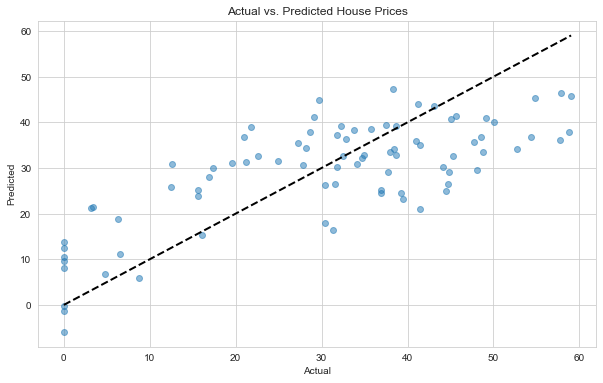

In [8]:
# Making predictions using the linear regression model
y_pred_lr = model.predict(X_test)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

La ligne pointillée diagonale représente l’endroit où les valeurs réelles et prédites seraient égales. Les points proches de cette ligne indiquent des prédictions précises. De l’intrigue, on peut observer :

De nombreux points sont proches de la ligne diagonale, ce qui suggère que le modèle fait des prédictions raisonnablement précises pour une partie importante de l’ensemble de test.
Certains points sont plus éloignés de la ligne, indiquant les zones où les prédictions du modèle s’écartent plus significativement des valeurs réelles.
C’est ainsi que nous pouvons prédire les prix de l’immobilier avec le Machine Learning à l’aide de Python.

# Construisons maintenant un modèle d’apprentissage automatique de bout en bout

In [9]:
import pandas as pd

# Load the dataset
real_estate_data = pd.read_csv("Real_Estate.csv") #replace the path with your path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

Ici, je viens d’entraîner le modèle. Pour comprendre en détail le processus d’entraînement du modèle, veuillez vous référer à cette partie détaillé sur la prévision des prix de l’immobilier en haut.

Maintenant, voici comment nous pouvons créer une solution de bout en bout pour notre modèle d’apprentissage automatique en utilisant le framework dash :

In [10]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [11]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center'}),
        
        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),
        
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'), 
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
                                columns=['distance_to_mrt', 'num_convenience_stores', 'latitude', 'longitude'])
        # Predict
        prediction = model.predict(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- distance_to_mrt
- latitude
- longitude
- num_convenience_stores
Feature names seen at fit time, yet now missing:
- Distance to the nearest MRT station
- Latitude
- Longitude
- Number of convenience stores




Maintenant, décomposons ce code et comprenons chaque partie du code :


import dash
from dash import html, dcc, Input, Output, State
import pandas as pd
Dans ce code, « dash » est la bibliothèque principale de Dash. Le html et le dcc (Dash Core Components) sont utilisés pour créer des composants HTML et interactifs. L’entrée, la sortie et l’état sont utilisés pour créer des rappels en dash (interactivité).

app = dash.Dash(__name__) 
Cette ligne initialise une nouvelle application Dash.

app.layout = html.Div([...])
Cette partie définit la structure HTML de l’application à l’aide des composants HTML de Dash. Notre mise en page comprend un titre (html. H1), des champs de saisie pour la distance à la station de MRT, le nombre de dépanneurs, la latitude et la longitude (dcc.Input), et un bouton pour déclencher la prédiction (html. Bouton).

@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'), 
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    ...
Il s’agit d’une fonction de rappel qui met à jour la sortie (résultat de la prédiction) lorsque vous cliquez sur le bouton « Prédire le prix ». Output('prediction_output', 'children') indique que le contenu interne (enfants) du composant avec id prediction_output sera mis à jour par ce callback.

Le rappel prend le nombre de clics sur les boutons comme entrée et les valeurs des quatre champs de saisie comme état. La fonction update_output est exécutée lorsque l’on clique sur le bouton, en utilisant les valeurs d’entrée pour générer une prédiction.


Dans la fonction update_output, les entrées sont d’abord vérifiées pour s’assurer qu’elles ne sont pas Aucune. Les entrées sont ensuite organisées dans un DataFrame Pandas, correspondant au format attendu pour le modèle. La méthode model.predict est appelée pour générer une prédiction. Cela suppose qu’un modèle entraîné nommé model existe et est accessible dans ce script. La fonction renvoie soit le prix prévu, soit une invite à saisir toutes les valeurs.

if __name__ == '__main__':
    app.run_server(debug=True)
Cette partie exécute le serveur d’applications lorsque le script est exécuté directement (__name__ == '__main__'). debug=True active le mode de débogage, qui fournit un débogueur interactif dans le navigateur et recharge automatiquement le serveur en cas de modification du code.